In [53]:
## Note: I only changed labels of sample train & validation files

In [16]:
import os
from tqdm.notebook import tqdm
import numpy as np
from random import shuffle
from glob import glob
from keras.applications.densenet import preprocess_input 
import matplotlib.pyplot as plt

target_names = ['W','S','A','D','WA','WD','SA','SD','NK']

Using TensorFlow backend.


In [2]:
def shuffler(X, y):
    ind = np.arange(len(X))
    np.random.shuffle(ind)
    X = X[ind]
    y = y[ind]
    return X, y

In [12]:
def shuffler_smaller(X, y):
    ind = np.arange(len(X))
    np.random.shuffle(ind)
    ind = ind[:int(len(ind)/2)]
    X = X[ind]
    y = y[ind]
    return X, y

In [3]:
def read_npy(path):
    df = np.load(path)
    ind = np.arange(df.shape[0])
    np.random.shuffle(ind)
    df = df[ind, :]
    X = np.array([i[0] for i in df])
    X = preprocess_input(X)
    y = np.array([i[1] for i in df])
    return X, y

In [4]:
LOOP_LIMIT = 9 # 10GB per batch/loop
FILE_LIMIT = 10
LOOP_LIMIT, FILE_LIMIT
# df_label.nbytes*.000001*452

(9, 10)

In [7]:
train_paths = glob(r"E:/pycrew/train/X*")
shuffle(train_paths)

In [8]:
len(train_paths)

44

In [10]:
X = np.load(train_paths[13])

In [8]:
y = np.load("E:/pycrew/train/y_train_batch280.npy")

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


2317


Text(0.5, 1.0, 'Key: W')

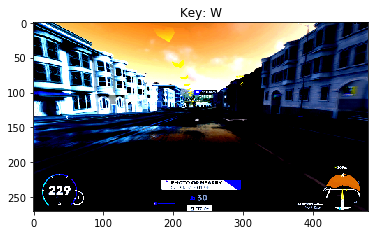

In [36]:
idx = np.random.randint(5000)
print(idx)
plt.imshow(X[idx])
plt.title("Key: " + target_names[np.argmax(y[idx], axis = -1)])

#### Shuffle all dataset with in 9 subsets

In [7]:
# for count, path in enumerate(train_paths):
#     if count == 0:
#         print("Read first .npy.")
#         data, label = read_npy(path)
#     elif (count != 0) & (count % FILE_LIMIT != 0):
#         print("Read file no {}".format(count))
#         file_data, file_label = read_npy(path)
#         data = np.concatenate((data, file_data))
#         label = np.concatenate((label, file_label))
#     elif count % FILE_LIMIT == 0:
#         print("Save batch {}.".format(count/FILE_LIMIT))
#         np.save("E:/pycrew/validation/X_val_batch{}.npy".format(count), data)
#         np.save("E:/pycrew/validation/y_val_batch{}.npy".format(count), label)
#         del data, label
#         data, label = read_npy(path)
#     elif count == len(train_paths) - 1:
#         print("Save last batch.")
#         np.save("E:/pycrew/validation/X_val_batch{}.npy".format(count), data)
#         np.save("E:/pycrew/validation/y_val_batch{}.npy".format(count), label)
#         del data, label       
#     else:
#         print("error")
#         break

### Randomly shuffle all dataset 

In [10]:
batches = np.arange(44)*10 + 20

In [11]:
batches

array([ 20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120, 130, 140,
       150, 160, 170, 180, 190, 200, 210, 220, 230, 240, 250, 260, 270,
       280, 290, 300, 310, 320, 330, 340, 350, 360, 370, 380, 390, 400,
       410, 420, 430, 440, 450])

In [10]:
# for c, batch in enumerate(batches):
#     print("Loop #", c)
#     X_path = "E:/pycrew/train/X_train_batch{}.npy".format(batch)
#     y_path = "E:/pycrew/train/y_train_batch{}.npy".format(batch)
#     X = np.load(X_path) 
#     y = np.load(y_path)
#     X, y = shuffler(X, y)
#     np.save(X_path, X)
#     np.save(y_path, y)

Loop # 0
Loop # 1
Loop # 2
Loop # 3
Loop # 4
Loop # 5
Loop # 6
Loop # 7
Loop # 8
Loop # 9
Loop # 10
Loop # 11
Loop # 12
Loop # 13
Loop # 14
Loop # 15
Loop # 16
Loop # 17
Loop # 18
Loop # 19
Loop # 20
Loop # 21
Loop # 22
Loop # 23
Loop # 24
Loop # 25
Loop # 26
Loop # 27
Loop # 28
Loop # 29
Loop # 30
Loop # 31
Loop # 32
Loop # 33
Loop # 34
Loop # 35
Loop # 36
Loop # 37
Loop # 38
Loop # 39
Loop # 40
Loop # 41
Loop # 42
Loop # 43


### Convert labels to multilabel

In [13]:
target_names = ['W','S','A','D','WA','WD','SA','SD','NK']

In [18]:
mlabel_dict = { "W" : np.array([1, 0, 0, 0, 0]),
                "S" : np.array([0, 1, 0, 0, 0]),
                "A" : np.array([0, 0, 1, 0, 0]),              
                "D" : np.array([0, 0, 0, 1, 0]),              
               "WA" : np.array([1, 0, 1, 0, 0]),               
               "WD" : np.array([1, 0, 0, 1, 0]),               
               "SA" : np.array([0, 1, 1, 0, 0]),               
               "SD" : np.array([0, 1, 0, 1, 0]),               
               "NK" : np.array([0, 0, 0, 0, 1])}

In [52]:
# for c, batch in enumerate(batches):
#     print("Loop #", c)
#     y_path = "E:/pycrew/train/y_train_batch{}.npy".format(batch)
#     y = np.load(y_path)
#     for idx in range(len(y)):
#         y_new [idx] = mlabel_dict[target_names[np.argmax(y[idx], axis = -1)]]
#     np.save(y_path, y_new)


## Save smaller validation data

In [13]:
x_path = 'C:/Users/mbura/Desktop/validation/X_val_batch20.npy'
X = np.load(x_path)

In [14]:
y_path = 'C:/Users/mbura/Desktop/validation/y_val_batch20.npy'
y = np.load(y_path)

In [24]:
X, y = shuffler_smaller(X, y)

In [25]:
X.shape, y.shape

((312, 270, 480, 3), (312, 5))

In [26]:
np.save(x_path, X)
np.save(y_path, y)

In [ ]:
idx = np.random.randint(5000)
print(idx)
plt.imshow(X[idx])
plt.title("Key: " + target_names[np.argmax(y[idx], axis = -1)])